# **Chapter 3: Neural Networks - Basics to Practical Coding**

---



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
  Dense(3, input_shape=(1,), activation='relu'),
  Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Synthetic data
X_train = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# Training the model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6230 - accuracy: 0.7000
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6211 - accuracy: 0.7000
Epoch 3/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6192 - accuracy: 0.7000
Epoch 4/10
1/1 [==============================] - 0s 18ms/step - loss: 0.6173 - accuracy: 0.7000
Epoch 5/10
1/1 [==============================] - 0s 15ms/step - loss: 0.6154 - accuracy: 0.7000
Epoch 6/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6135 - accuracy: 0.7000
Epoch 7/10
1/1 [==============================] - 0s 16ms/step - loss: 0.6117 - accuracy: 0.7000
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6098 - accuracy: 0.7000
Epoch 9/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6079 - accuracy: 0.7000
Epoch 10/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6061 - accuracy: 0.7000


In [ ]:
# Testing with new data
X_test = np.array([10, 11, 12])
predictions = model.predict(X_test)
print(predictions)

1/1 [==============================] - 0s 183ms/step
[[0.9995638 ]
 [0.99979913]
 [0.9999075 ]]


# **Chapter 4: Convolutional Neural Networks (CNNs)**

---



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Assuming 10 classes for classification
])


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Load and preprocess data
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalizing the data

# Reshape data to fit the model
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Train the model
model.fit(X_train, y_train, epochs=5)


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# **Chapter 5: Recurrent Neural Networks (RNNs) and LSTM**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
# Load the IMDB dataset
vocab_size = 10000
maxlen = 120
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)


In [ ]:
model = Sequential([
    Embedding(vocab_size, 32, input_length=maxlen),
    LSTM(64),
    Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest Accuracy: {test_acc}')


# **Chapter 6: Large Language Models**

In [ ]:
!pip install transformers
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer


In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [ ]:
input_ids = tokenizer.encode('Today is a beautiful day', return_tensors='tf')

# Using Beam Search
output = model.generate(input_ids, max_length=50, num_return_sequences=1, num_beams=1)


print("Generated Text:\n")
for i, text in enumerate(output):
    print(f"{i+1}: {tokenizer.decode(text, skip_special_tokens=True)}\n")



Generated Text:

1: Today is a beautiful day for the world.

The world is a beautiful place.

The world is a beautiful place.

The world is a beautiful place.

The world is a beautiful place.

The world is



# **Chapter 7: Generative Models: GANs and Autoencoders**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv2DTranspose, Flatten, Reshape
from tensorflow.keras.models import Model


In [ ]:
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = Flatten()(x)
encoded = Dense(64, activation='relu')(x)

# Decoder
x = Dense(784, activation='relu')(encoded)
decoded = Reshape((28, 28, 1))(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, validation_data=(x_test, x_test))


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
235/235 [==============================] - 26s 107ms/step - loss: 0.3950 - val_loss: 0.2882
Epoch 2/5
235/235 [==============================] - 24s 104ms/step - loss: 0.2606 - val_loss: 0.2380
Epoch 3/5
235/235 [==============================] - 23s 97ms/step - loss: 0.2306 - val_loss: 0.2095
Epoch 4/5
235/235 [==============================] - 25s 105ms/step - loss: 0.2107 - val_loss: 0.1953
Epoch 5/5
235/235 [==============================] - 25s 107ms/step - loss: 0.2023 - val_loss: 0.2089


1/1 [==============================] - 0s 40ms/step


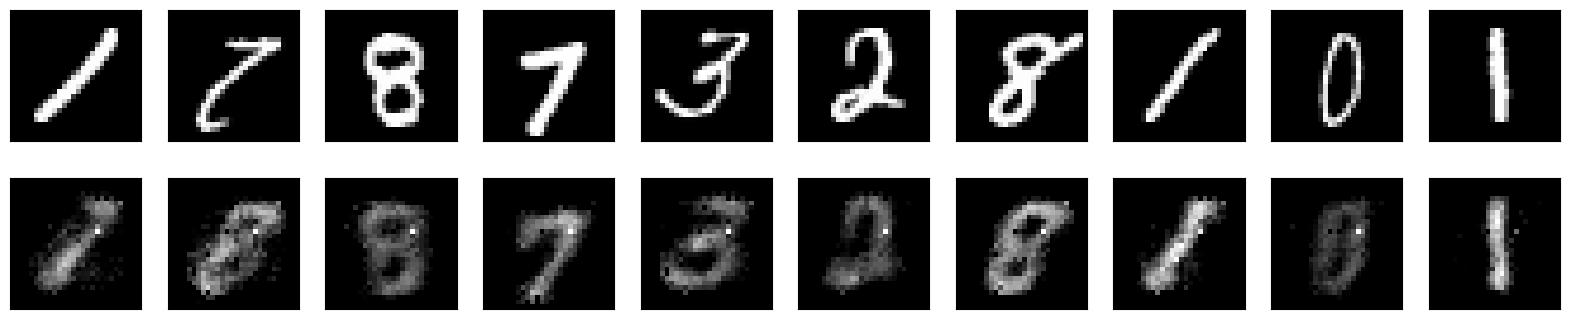

In [ ]:
import matplotlib.pyplot as plt

def display_reconstructed_images(autoencoder, n=10):
    # Select a random set of images from the test dataset
    indices = np.random.randint(len(x_test), size=n)
    test_images = x_test[indices]
    reconstructed_images = autoencoder.predict(test_images)

    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(test_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Call the function to display reconstructed images
display_reconstructed_images(autoencoder)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Generator model
def build_generator(latent_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=latent_dim),
        Dense(784, activation='sigmoid'),  # 28x28 pixels
        Reshape((28, 28, 1))
    ])
    return model

# Discriminator model
def build_discriminator(in_shape=(28,28,1)):
    model = Sequential([
        Flatten(input_shape=in_shape),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Compile the GAN model
def compile_gan(generator, discriminator):
    # Compile discriminator
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])
    # Set discriminator not trainable in GAN
    discriminator.trainable = False
    # Compile GAN
    gan = Sequential([generator, discriminator])
    gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    return gan

# Training function
def train_gan(generator, discriminator, gan, dataset, latent_dim, epochs=100, batch_size=256):
    for epoch in range(epochs):
        for _ in range(dataset.shape[0] // batch_size):
            # Generate fake images
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            fake_images = generator.predict(noise)
            # Get real images
            idx = np.random.randint(0, dataset.shape[0], batch_size)
            real_images = dataset[idx]
            # Train discriminator
            d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
            d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            # Train generator
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))
            # Print the progress
            print(f'Epoch: {epoch+1}, Discriminator Loss: {d_loss}, Generator Loss: {g_loss}')

In [ ]:
# Load and prepare MNIST dataset
def load_mnist_data():
    (x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
    x_train = np.expand_dims(x_train, axis=-1)
    x_train = x_train.astype('float32') / 255.0
    return x_train

# Define hyperparameters
latent_dim = 100

# Build and compile the GAN
generator = build_generator(latent_dim)
discriminator = build_discriminator()
gan = compile_gan(generator, discriminator)

# Load dataset
dataset = load_mnist_data()

# Train the GAN
train_gan(generator, discriminator, gan, dataset, latent_dim, epochs=100, batch_size=256)


Streaming output truncated to the last 5000 lines.
8/8 [==============================] - 0s 4ms/step
Epoch: 9, Discriminator Loss: [0.33116487 0.8515625 ], Generator Loss: 2.1316399574279785
8/8 [==============================] - 0s 4ms/step
Epoch: 9, Discriminator Loss: [0.35335796 0.85546875], Generator Loss: 2.070131301879883
8/8 [==============================] - 0s 3ms/step
Epoch: 9, Discriminator Loss: [0.31669384 0.87109375], Generator Loss: 2.232740879058838
8/8 [==============================] - 0s 4ms/step
Epoch: 9, Discriminator Loss: [0.36494499 0.82617188], Generator Loss: 2.1855223178863525
8/8 [==============================] - 0s 3ms/step
Epoch: 9, Discriminator Loss: [0.31872542 0.8671875 ], Generator Loss: 2.2252657413482666
8/8 [==============================] - 0s 5ms/step
Epoch: 9, Discriminator Loss: [0.27716454 0.88476562], Generator Loss: 2.3247857093811035
8/8 [==============================] - 0s 5ms/step
Epoch: 9, Discriminator Loss: [0.35763977 0.83984375],

KeyboardInterrupt: 

1/1 [==============================] - 0s 296ms/step


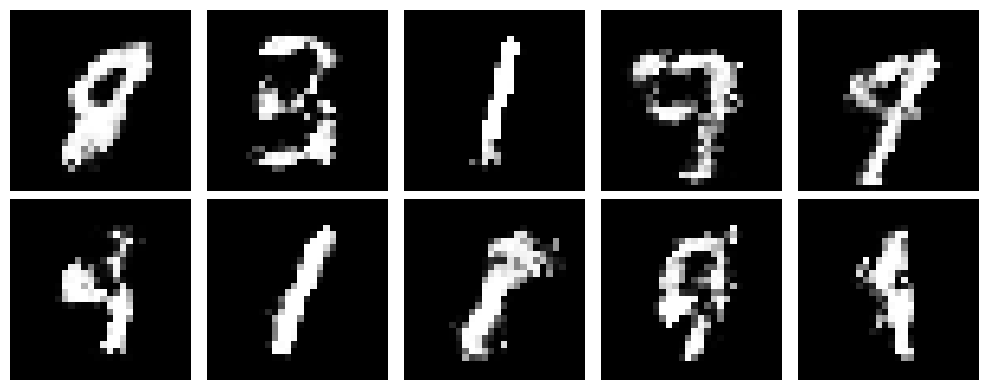

In [ ]:
# Function to generate and visualize images
def display_generated_images(generator, latent_dim, n=10):
    noise = np.random.normal(0, 1, (n, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(n, 28, 28)
    plt.figure(figsize=(10, 4))
    for i in range(n):
        plt.subplot(2, 5, i + 1)
        plt.imshow(generated_images[i], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display generated images
display_generated_images(generator, latent_dim)